In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [139]:
# Biom table information
# samples were processed on the custom 986 cMAG database using sourmash 51 mer for species ID
# Datasets included: Qiita study ID: 15947 (artifact 18319: PB Hifi seqwell data)
    # Qiita study ID: 15889 seqwell expanded dataset (artifacts: 18322, 18323, 18324, 18325, 18326, 18327)
    # samples were merged on the basis of sample_name as many of the samples from seqwell were technical duplicates
    # note, a total of 24 samples (6 timepoint across 4 participants: 526, 549, 791, and 798 were included as tech reps and are indicated in the sheet as duplicate_tech=1 or 2)
# A combined analysis of the two datasets was completed (Qiita Analysis ID: 69753)
# Samples were filtered as follows: retain samples with 1 or more features, remove one of the technical duplicates across the sample set to ensure ML isnt artificially inflated based on a tech rep, exclude positive control samples, )

# sample sets were rarified with replacement to 100,000,000 (~100Mbp)

# LAZ stunting: 41 total participants (6 from the original cohort of 8 and an additional 35) 


In [140]:
#####################################

## Evaluate laz_stunting_bool (0=non stunted, 1=stunted)
# PAV



In [4]:
pwd

'/Users/jminich/Desktop/LR_MG_REVISION/LR-MG_Data/1_RESUBMISSION/Notebooks'

In [141]:
# randomly select 19 numbers from 1-24 (training set 1, LAZ all time points non stunted)
import random


In [104]:
random.seed(67)
#total of 41 partipants which are consistently either stunted or nonstunted across all time points 
#stunted split is 22 nonstunted and 19 stunted (relatively balanced)
#need to assign 75% of samples as training set and rest as non training, thus need 34 samples as training (out of 43)
# 5, 5 split
hsid_list=[500,504,526,535,549,553,556,562,564,629,640,641,671,683,687,690,699,700,718,721,724,727,742,767,775,776,779,793,798,804,807,820,842,843,853,862,866,870,898,529,694]
r_test_1=random.sample(hsid_list,10)
print(r_test_1)

[549, 562, 779, 804, 898, 700, 793, 820, 862, 683]


In [212]:
random.seed(43)
#total of 41 partipants which are consistently either stunted or nonstunted across all time points 
#stunted split is 22 nonstunted and 19 stunted (relatively balanced)
#need to assign 75% of samples as training set and rest as non training, thus need 34 samples as training (out of 43)
# 4, 6 split
hsid_list=[500,504,526,535,549,553,556,562,564,629,640,641,671,683,687,690,699,700,718,721,724,727,742,767,775,776,779,793,798,804,807,820,842,843,853,862,866,870,898,529,694]
r_test_2=random.sample(hsid_list,10)
print(r_test_2)

[526, 718, 629, 804, 767, 556, 870, 820, 504, 793]


In [17]:
random.seed(50)
#total of 41 partipants which are consistently either stunted or nonstunted across all time points 
#stunted split is 22 nonstunted and 19 stunted (relatively balanced)
#need to assign 75% of samples as training set and rest as non training, thus need 34 samples as training (out of 43)
# 6, 4 split
hsid_list=[500,504,526,535,549,553,556,562,564,629,640,641,671,683,687,690,699,700,718,721,724,727,742,767,775,776,779,793,798,804,807,820,842,843,853,862,866,870,898,529,694]
r_test_3=random.sample(hsid_list,10)
print(r_test_3)

[820, 700, 767, 690, 807, 727, 553, 724, 687, 853]


In [18]:
random.seed(53)
#total of 41 partipants which are consistently either stunted or nonstunted across all time points 
#stunted split is 22 nonstunted and 19 stunted (relatively balanced)
#need to assign 75% of samples as training set and rest as non training, thus need 34 samples as training (out of 43)
# 6, 4 split
hsid_list=[500,504,526,535,549,553,556,562,564,629,640,641,671,683,687,690,699,700,718,721,724,727,742,767,775,776,779,793,798,804,807,820,842,843,853,862,866,870,898,529,694]
r_test_4=random.sample(hsid_list,10)
print(r_test_4)

[529, 683, 804, 842, 807, 843, 767, 898, 504, 526]


In [22]:
random.seed(57)
#total of 41 partipants which are consistently either stunted or nonstunted across all time points 
#stunted split is 22 nonstunted and 19 stunted (relatively balanced)
#need to assign 75% of samples as training set and rest as non training, thus need 34 samples as training (out of 43)
# 5, 5 split
hsid_list=[500,504,526,535,549,553,556,562,564,629,640,641,671,683,687,690,699,700,718,721,724,727,742,767,775,776,779,793,798,804,807,820,842,843,853,862,866,870,898,529,694]
r_test_5=random.sample(hsid_list,10)
print(r_test_5)

[526, 767, 870, 504, 687, 842, 724, 807, 718, 793]


In [299]:
### PAV (LAZ stunted vs nonstunted & linear growth)
## Beta diversity analysis
# original biom table needs to be transformed so that samples are rows and features are columns...and the end includes metadata categories
# Load microbiome feature data (e.g., OTU table)
# <r100M_PAV_216962_taxa_trans.csv> this biom table has metadata at the end of the feature table to enable subsampling
# Note, for biom table, ensure sample name is same from mapping file (may need to remove prefix)
otu_table4 = pd.read_csv("../Supp_tables/Table_S21_R2b_r100M_PAV_216962_taxa_trans.csv", index_col=0)

# Note for metadata, need to 1) change sample_name to sample_id in metadata 2) remove any samples in metadata which are not included in analysis

# Load metadata with the target variable
metadata4 = pd.read_csv("../Supp_tables/Table_S20_R2b_r100M_metadata.csv")


In [300]:
# LAZ
# subsample feature table to only include samples with stable LAZ values across all timepoints with data (all stunted or all nonstunted)
otu_table_laz=otu_table4.loc[otu_table4['LAZ_stable']==1] #165 total samples
otu_table_laz.shape
#otu_table_laz.head()

(165, 2180)

In [301]:
# subsample the metadata table  only include samples with stable LAZ values across all timepoints with data (all stunted or all nonstunted)
metadata_laz=metadata4.loc[metadata4['LAZ_stable']==1]
metadata_laz.shape

(165, 62)

In [302]:
# Ensure rows (samples) align in both datasets
otu_table_laz = otu_table_laz.loc[metadata_laz['sample_id']]

In [303]:
###########

In [304]:
# subsample Training and Testing dataset previously encoded from feature table

otu_train_1=otu_table_laz.loc[otu_table_laz['laz_t5']==1] #change to either laz_t1, laz_t2, laz_t3, laz_t4, or laz_t5 for replicate tests
otu_test_1=otu_table_laz.loc[otu_table_laz['laz_t5']==0] #change to either laz_t1, laz_t2, laz_t3, laz_t4, or laz_t5 for replicate tests

otu_train_1.shape #120
otu_test_1.shape #45

(41, 2180)

In [305]:
# subsample metadata table twice to create a Y_train and Y_test
md_train=metadata_laz.loc[metadata_laz['laz_t5']==1] #change to either laz_t1, laz_t2, laz_t3, laz_t4, or laz_t5 for replicate tests
md_test=metadata_laz.loc[metadata_laz['laz_t5']==0] #change to either laz_t1, laz_t2, laz_t3, laz_t4, or laz_t5 for replicate tests
md_train.shape #120
md_test.shape #45

(41, 62)

In [306]:
#remove extra columns (non features) from feature table
otu_train_1_dr=otu_train_1.drop(['id','breastfed','hsid', 'linear_growth', 'laz_stunting_bool', 'linear_growth_num', 'site_village', 'collection_week','LAZ_stable','laz_stunting_cat','age_months','laz','laz_t1','laz_t2','laz_t3','laz_t4','laz_t5'], axis=1)
otu_train_1_dr.head()
X_train=otu_train_1_dr


In [307]:
#remove extra columns (non features) from feature table
otu_test_1_dr=otu_test_1.drop(['id','breastfed','hsid', 'linear_growth', 'laz_stunting_bool', 'linear_growth_num', 'site_village', 'collection_week','LAZ_stable','laz_stunting_cat','age_months','laz','laz_t1','laz_t2','laz_t3','laz_t4','laz_t5'], axis=1)
otu_test_1_dr.head()
X_test=otu_test_1_dr



In [308]:
# reduce the training and testing metadata to only sample_id and the laz_stunting_bool
Y_train=md_train[['sample_id', 'laz_stunting_bool']]
Y_train.head()

#resets the index
Y_train.set_index('sample_id', inplace=True)
print(Y_train.index)



Index(['15889.500.FB00259114', '15889.500.FB00862515', '15889.500.FB00929809',
       '15889.500.FB00935447', '15889.529.FB00267678', '15889.529.FB00851218',
       '15889.529.FB00934574', '15889.529.FB00941864', '15889.535.FB00267778',
       '15889.535.FB00862841',
       ...
       '15889.853.FB00922160', '15889.853.FB01123205', '15889.862.FB00929603',
       '15889.862.FB00935290', '15889.862.FB01123182', '15889.866.FB00942959',
       '15889.866.FB01125333', '15889.898.FB00856082', '15889.898.FB00925481',
       '15889.898.FB01123219'],
      dtype='object', name='sample_id', length=124)


In [309]:
Y_test=md_test[['sample_id', 'laz_stunting_bool']]
Y_test.head()
Y_test.set_index('sample_id', inplace=True)
print(Y_test.index)

Index(['15889.504.FB00259057', '15889.504.FB00862528', '15889.504.FB00863333',
       '15889.504.FB00930520', '15889.504.FB00935300', '15889.526.FB00055451',
       '15889.526.FB00259294', '15889.526.FB00852347', '15889.526.FB00862391',
       '15889.526.FB00935408', '15889.526.FB00942023', '15889.687.FB00057455',
       '15889.687.FB00850553', '15889.687.FB00859020', '15889.687.FB00931349',
       '15889.718.FB00052053', '15889.718.FB00851335', '15889.718.FB00857379',
       '15889.718.FB00934097', '15889.724.FB00255916', '15889.724.FB00257932',
       '15889.724.FB00851409', '15889.724.FB00929418', '15889.767.FB00857442',
       '15889.767.FB00864004', '15889.767.FB00930960', '15889.793.FB00856990',
       '15889.793.FB00937936', '15889.793.FB01126184', '15889.807.FB00252896',
       '15889.807.FB00260312', '15889.807.FB00856975', '15889.807.FB00863924',
       '15889.807.FB00935524', '15889.842.FB00259837', '15889.842.FB00931143',
       '15889.842.FB01126996', '15889.842.FB01923487

In [310]:
X_train.head()
X_test.head()
Y_train.head()
Y_test.head()

,laz_stunting_bool
sample_id,
15889.504.FB00259057,0
15889.504.FB00862528,0
15889.504.FB00863333,0
15889.504.FB00930520,0
15889.504.FB00935300,0


In [311]:
## 4) Train a random forest classifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)

# Do this if you have imbalanced classifications...
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# need to change shape of y_train to 1D array
y_train2=Y_train.values.flatten()

y_train2

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [312]:
# Train the model
rf_model.fit(X_train, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [313]:
## 5_ Evaluate the model
y_pred=rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.7073170731707317
Confusion Matrix:
 [[18  5]
 [ 7 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75        23
           1       0.69      0.61      0.65        18

    accuracy                           0.71        41
   macro avg       0.70      0.70      0.70        41
weighted avg       0.71      0.71      0.70        41



<Axes: >

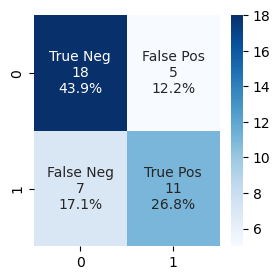

In [314]:
cf=confusion_matrix(Y_test, y_pred)

#Viz of confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]

group_percentages = ["{0:.1%}".format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(3,3))
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues')
#plt.savefig("results/RF_r100M_taxa_PAV_linear_growth.png", dpi=600, bbox_inches="tight")

In [315]:
## 6 Feature importance
# Extract feature importances
importances = rf_model.feature_importances_

# Match with feature names
feature_importances = pd.DataFrame({
    'Feature': otu_train_1_dr.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances.head(100))


                               Feature  Importance
348             s__CAG-194 sp000432915    0.010402
33         s__Agathobacter sp905209075    0.008432
1457         s__Prevotella sp000434975    0.008203
1481         s__Prevotella sp900548535    0.008158
28         s__Agathobacter sp900543445    0.007942
...                                ...         ...
840              s__Escherichia coli_F    0.002856
736   s__Cryptobacteroides sp000433355    0.002840
776       s__Dysosmobacter sp019417795    0.002829
1729      s__Streptococcus infantarius    0.002822
164         s__Bacteroides sp947646015    0.002776

[100 rows x 2 columns]


In [316]:
# export results
feature_importances.to_csv('../ML_redo_2025-06-11/r2_r100M_taxa_PAV_LAZ_Train5.csv', index=False)

In [368]:
top18=otu_table_laz[["s__Prevotella sp900552515",
"s__Prevotella sp000434975",
"s__Acetatifactor intestinalis",
"s__Phocaeicola vulgatus",
"s__Lachnospira eligens_A",
"s__UMGS2037_genus_unkn_species",
"s__Streptococcus_genus_unkn_species",
"s__Campylobacter_D upsaliensis",
"s__Prevotella sp021636625",
"s__Limisoma sp000437795",
"s__Prevotella sp022732315",
"s__Faecalibacterium sp014858325",
"s__Megasphaera sp900540735",
"s__Prevotella stercorea",
"s__Phocaeicola dorei",
"s__Prevotella sp900548535",
"s__Agathobaculum butyriciproducens",
"s__Prevotella copri_I", "hsid", "laz_stunting_bool", "age_months","laz"]]

In [369]:
top18.head()

,s__Prevotella sp900552515,s__Prevotella sp000434975,s__Acetatifactor intestinalis,s__Phocaeicola vulgatus,s__Lachnospira eligens_A,s__UMGS2037_genus_unkn_species,s__Streptococcus_genus_unkn_species,s__Campylobacter_D upsaliensis,s__Prevotella sp021636625,s__Limisoma sp000437795,...,s__Megasphaera sp900540735,s__Prevotella stercorea,s__Phocaeicola dorei,s__Prevotella sp900548535,s__Agathobaculum butyriciproducens,s__Prevotella copri_I,hsid,laz_stunting_bool,age_months,laz
sample_id,,,,,,,,,,,,,,,,,,,,,
15889.500.FB00259114,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,500,1,29.44,-2.47
15889.500.FB00862515,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,1,500,1,23.92,-3.21
15889.500.FB00929809,0,0,0,0,1,0,0,0,0,1,...,1,1,0,0,1,0,500,1,32.20,-3.28
15889.500.FB00935447,0,0,0,0,0,0,0,0,1,1,...,1,1,0,0,0,0,500,1,34.96,-2.96
15889.504.FB00259057,1,0,0,0,0,0,0,0,1,1,...,0,1,0,1,0,0,504,0,28.91,-0.44


In [379]:
pwd

'/Users/jminich/Desktop/LR_MG_REVISION/LR-MG_Data/1_RESUBMISSION/Notebooks'

In [382]:
### 
relabun = pd.read_csv("../Supp_tables/Table_S19_r100M_relabund_216959_taxa_trans.csv", index_col=0)

# Note for metadata, need to 1) change sample_name to sample_id in metadata 2) remove any samples in metadata which are not included in analysis

# Load metadata with the target variable
metadata4 = pd.read_csv("../Supp_tables/R2b_Table_S20_r100M_metadata.csv")


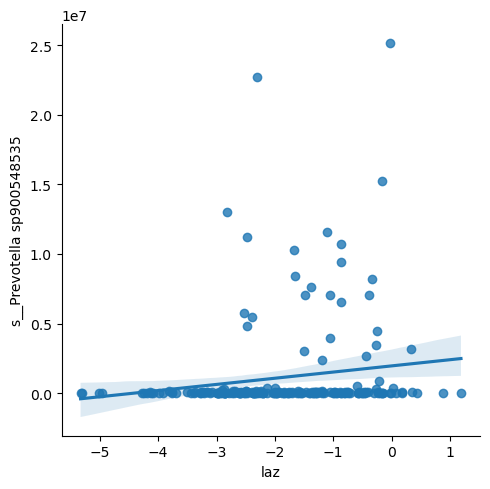

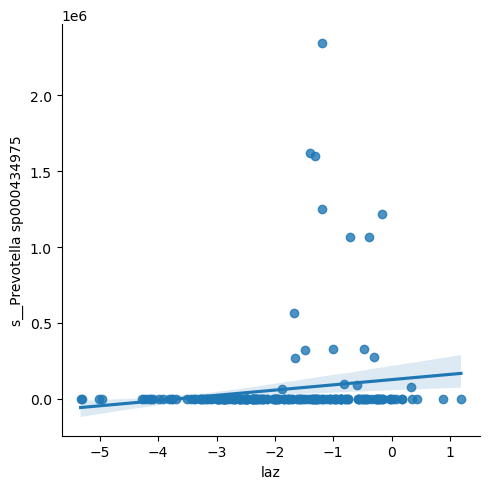

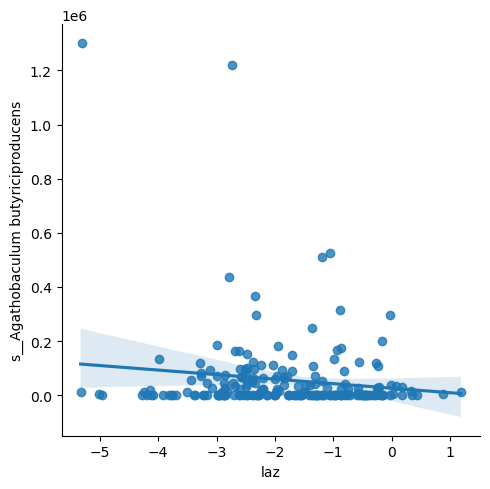

In [383]:
sns.lmplot(data=relabun, x="laz", y="s__Prevotella sp900548535")
sns.lmplot(data=relabun, x="laz", y="s__Prevotella sp000434975")
sns.lmplot(data=relabun, x="laz", y="s__Agathobaculum butyriciproducens")


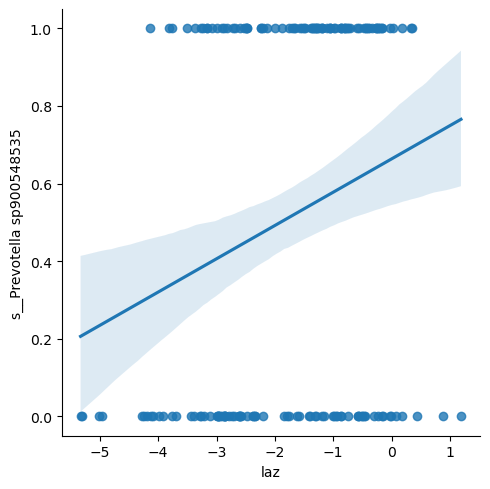

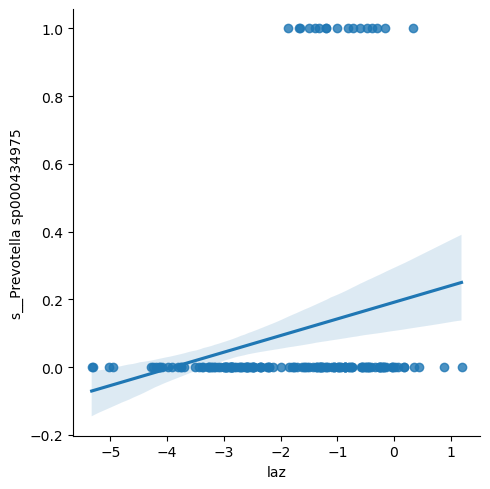

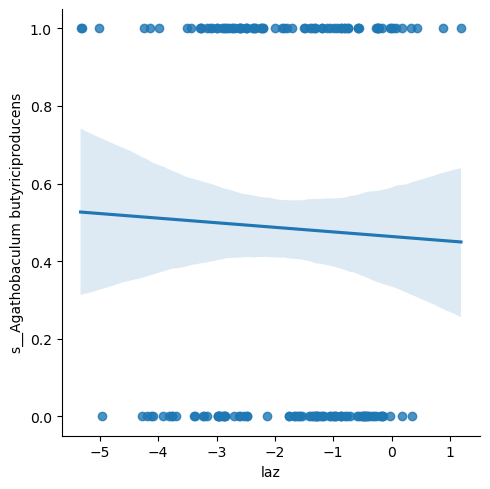

In [377]:
sns.lmplot(data=top18, x="laz", y="s__Prevotella sp900548535", hue=)
sns.lmplot(data=top18, x="laz", y="s__Prevotella sp000434975")

sns.lmplot(data=top18, x="laz", y="s__Agathobaculum butyriciproducens")


/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_32283/700713706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Prevotella sp900552515", palette=colors)


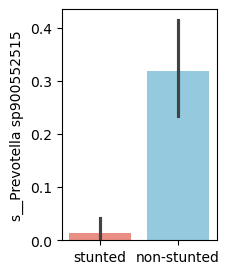

In [392]:
plt.figure(figsize=(2,3))
colors=["salmon", "skyblue"]
a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Prevotella sp900552515", palette=colors)
a.set(xlabel=None)
plt.savefig("../s__Prevotella sp900552515.png", dpi=600,bbox_inches="tight")

/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_32283/2828556604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Prevotella sp000434975", palette=colors)


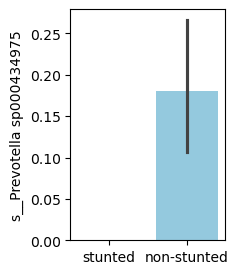

In [394]:
plt.figure(figsize=(2,3))
colors=["salmon", "skyblue"]
a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Prevotella sp000434975", palette=colors)
a.set(xlabel=None)
plt.savefig("../s__Prevotella sp000434975.png", dpi=600,bbox_inches="tight")

/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_32283/982430431.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Acetatifactor intestinalis", palette=colors)


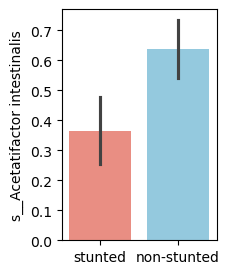

In [395]:
plt.figure(figsize=(2,3))
colors=["salmon", "skyblue"]
a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Acetatifactor intestinalis", palette=colors)
a.set(xlabel=None)
plt.savefig("../s__Acetatifactor intestinalis.png", dpi=600,bbox_inches="tight")

/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_32283/1044841239.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Phocaeicola vulgatus", palette=colors)


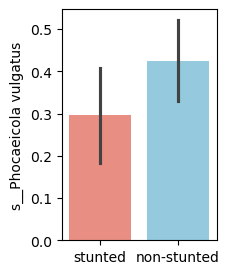

In [396]:
plt.figure(figsize=(2,3))
colors=["salmon", "skyblue"]
a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Phocaeicola vulgatus", palette=colors)
a.set(xlabel=None)
plt.savefig("../s__Phocaeicola vulgatus.png", dpi=600,bbox_inches="tight")

/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_32283/3761128521.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Lachnospira eligens_A", palette=colors)


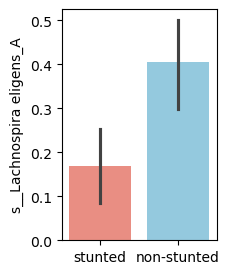

In [397]:
plt.figure(figsize=(2,3))
colors=["salmon", "skyblue"]
a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Lachnospira eligens_A", palette=colors)
a.set(xlabel=None)
plt.savefig("../s__Lachnospira eligens_A.png", dpi=600,bbox_inches="tight")

/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_32283/1336696419.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__UMGS2037_genus_unkn_species", palette=colors)


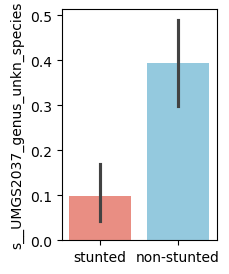

In [398]:
plt.figure(figsize=(2,3))
colors=["salmon", "skyblue"]
a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__UMGS2037_genus_unkn_species", palette=colors)
a.set(xlabel=None)
plt.savefig("../s__UMGS2037_genus_unkn_species.png", dpi=600,bbox_inches="tight")

/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_32283/2363712519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Streptococcus_genus_unkn_species", palette=colors)


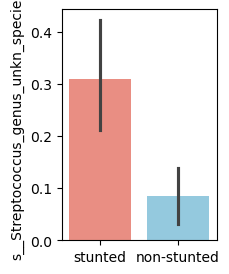

In [399]:
plt.figure(figsize=(2,3))
colors=["salmon", "skyblue"]
a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Streptococcus_genus_unkn_species", palette=colors)
a.set(xlabel=None)
plt.savefig("../s__Streptococcus_genus_unkn_species.png", dpi=600,bbox_inches="tight")


/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_32283/3180015669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Campylobacter_D upsaliensis", palette=colors)


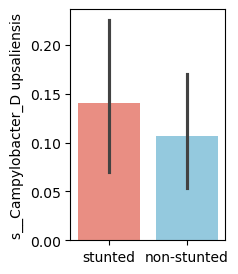

In [400]:
plt.figure(figsize=(2,3))
colors=["salmon", "skyblue"]
a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Campylobacter_D upsaliensis", palette=colors)
a.set(xlabel=None)
plt.savefig("../s__Campylobacter_D upsaliensis.png", dpi=600,bbox_inches="tight")

/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_32283/1481967632.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Prevotella sp021636625", palette=colors)


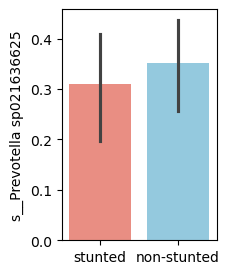

In [401]:
plt.figure(figsize=(2,3))
colors=["salmon", "skyblue"]
a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Prevotella sp021636625", palette=colors)
a.set(xlabel=None)
plt.savefig("../s__Prevotella sp021636625.png", dpi=600,bbox_inches="tight")

/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_32283/3829116424.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Limisoma sp000437795", palette=colors)


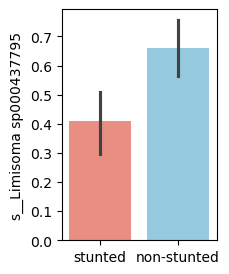

In [402]:
plt.figure(figsize=(2,3))
colors=["salmon", "skyblue"]
a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Limisoma sp000437795", palette=colors)
a.set(xlabel=None)
plt.savefig("../s__Limisoma sp000437795.png", dpi=600,bbox_inches="tight")

/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_32283/956338509.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Prevotella sp022732315", palette=colors)


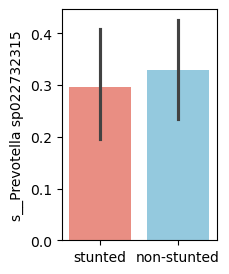

In [403]:
plt.figure(figsize=(2,3))
colors=["salmon", "skyblue"]
a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Prevotella sp022732315", palette=colors)
a.set(xlabel=None)
plt.savefig("../s__Prevotella sp022732315.png", dpi=600,bbox_inches="tight")

/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_32283/2113957426.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Faecalibacterium sp014858325", palette=colors)


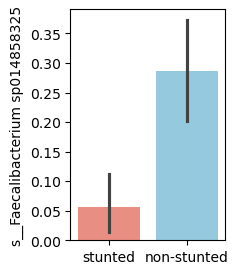

In [404]:
plt.figure(figsize=(2,3))
colors=["salmon", "skyblue"]
a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Faecalibacterium sp014858325", palette=colors)
a.set(xlabel=None)
plt.savefig("../s__Faecalibacterium sp014858325.png", dpi=600,bbox_inches="tight")

/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_32283/3528445011.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Megasphaera sp900540735", palette=colors)


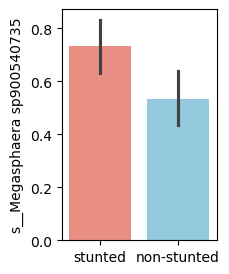

In [405]:
plt.figure(figsize=(2,3))
colors=["salmon", "skyblue"]
a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Megasphaera sp900540735", palette=colors)
a.set(xlabel=None)
plt.savefig("../s__Megasphaera sp900540735.png", dpi=600,bbox_inches="tight")

/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_32283/267088728.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Prevotella stercorea", palette=colors)


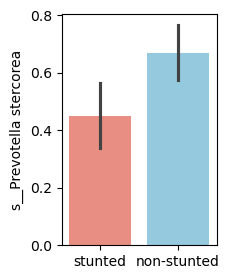

In [406]:
plt.figure(figsize=(2,3))
colors=["salmon", "skyblue"]
a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Prevotella stercorea", palette=colors)
a.set(xlabel=None)
plt.savefig("../s__Prevotella stercorea.png", dpi=600,bbox_inches="tight")

/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_32283/2439791989.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Phocaeicola dorei", palette=colors)


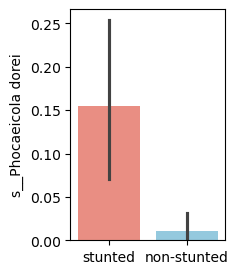

In [407]:
plt.figure(figsize=(2,3))
colors=["salmon", "skyblue"]
a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Phocaeicola dorei", palette=colors)
a.set(xlabel=None)
plt.savefig("../s__Phocaeicola dorei.png", dpi=600,bbox_inches="tight")

/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_32283/873658490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Prevotella sp900548535", palette=colors)


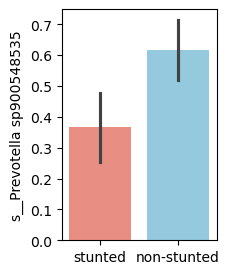

In [408]:
plt.figure(figsize=(2,3))
colors=["salmon", "skyblue"]
a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Prevotella sp900548535", palette=colors)
a.set(xlabel=None)
plt.savefig("../s__Prevotella sp900548535.png", dpi=600,bbox_inches="tight")

/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_32283/3335338045.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Agathobaculum butyriciproducens", palette=colors)


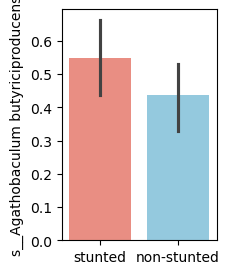

In [409]:
plt.figure(figsize=(2,3))
colors=["salmon", "skyblue"]
a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Agathobaculum butyriciproducens", palette=colors)
a.set(xlabel=None)
plt.savefig("../s__Agathobaculum butyriciproducens.png", dpi=600,bbox_inches="tight")


/var/folders/fn/jfmrwpqn42nb9mbwywn_xw_w0000gp/T/ipykernel_32283/2650002978.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Prevotella copri_I", palette=colors)


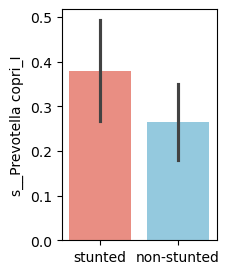

In [410]:
plt.figure(figsize=(2,3))
colors=["salmon", "skyblue"]
a=sns.barplot(data=otu_table_laz, x="laz_stunting_cat", y="s__Prevotella copri_I", palette=colors)
a.set(xlabel=None)
plt.savefig("../s__Prevotella copri_I.png", dpi=600,bbox_inches="tight")